In [ ]:
#imports

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib

Tony's Picture refers to the following:

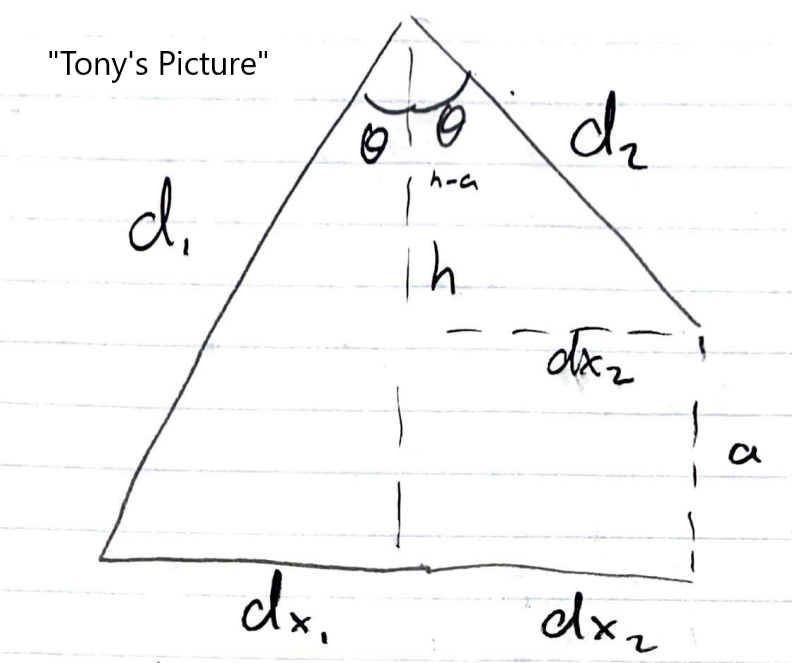

"Tony's Picture" refers to the above image.

We assume an imaginary apex or reflection point at some altitude in the ionosphere. That altitude will be referred to as h. We have an ionosonde sending a LFM chirp upwards, which will be reflected down towards a CubeSat in orbit at an altitude a. The relfection angle is theta, and the ground distance between the CubeSat and the ionosonde station (or other signal origin) is dx.

The total flight distance of the signal, d1 + d2, will be referred to as d in this program.

In [51]:
#values

fs = 20e6  # sampling rate
N = 1e5  # number of samples

m = 300  # chirp slope
b = 1  # chirp initial (angular) frequency

t = np.arange(N) / float(fs) # make an array out of all samples
w = m * t + b # variable for frequency related to time
tx = np.cos(w * fs * t) # chirp signal
tx[int(len(tx) / 2) :] = 0 # sample over time

d = 700e3   # m                d_1 + d_2 (look at tony's picture)
dx = 100e3  # m                distance from transmitter
theta = np.arcsin(dx/d)
a = 350e3   # m                altitude
c = 3e8  # m/s

delay_s = d / c # delay in seconds (tau), one way receive
delay_samps = int(delay_s * fs) # sample over time

rx = np.roll(tx, delay_samps) # define rx as tx but delayed

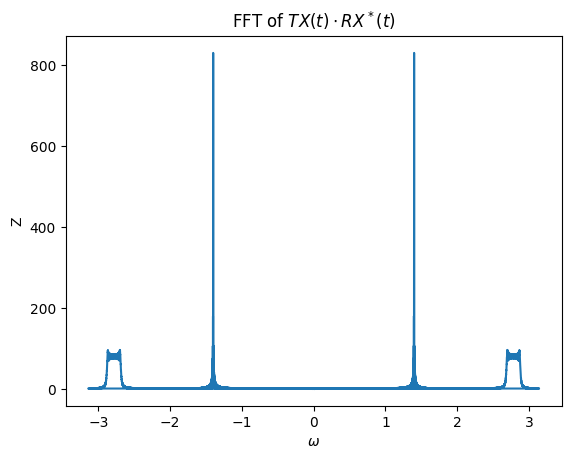

In [52]:
z = tx * np.conj(rx) # multiply tx by the complex conjugate

freq = np.fft.fftfreq(z.shape[-1]) # take fourier transform of tx x rx*
omega = 2 * np.pi * freq # definition of omega
win = np.hanning(len(z)) # hanning window - smooth the values
Z = np.fft.fft(win * z) # take FFT of hanning window

plt.plot(omega, np.abs(Z))
plt.xlabel("$\omega$")
plt.ylabel("Z")
plt.title("FFT of $TX(t) \cdot RX^*(t)$")
plt.show()

In [59]:
w_1 = abs(omega[np.argmax(np.abs(Z))]) # absolute value it LMAO
tau_est = w_1 / (2 * m)
d_est = tau_est*c

# we know what dx is, we know what a is, because of onboard instruments
theta_est = np.arcsin(dx/d_est)
h_est = (d_est * np.cos(theta_est) + a)/2

h_est

521399.1784334741